In [1]:
import pandas as pd 
import numpy as np 


In [2]:
#get the data in 

raw_df= pd.read_csv(r'C:\Users\Devin\Desktop\thinkful\unsupervised\Mall_customers.csv')

This dataset was taken from kaggle and contains a handful of metrics on customers that routinely visit a mall. 


In [3]:
raw_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#encode the gender column, it is currently an object  
raw_df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [6]:
#female will equal 1 

raw_df['Gender'].replace({'Female' : 1, 'Male' : 0}, inplace=True)

In [7]:
# no missing values 
raw_df.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [8]:
#drop customer id, does not contain any actual information on the customer  

raw_df.drop('CustomerID', axis=1, inplace=True)

In [9]:
#now scale the data for the unsupervised learning models

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df = scaler.fit_transform(raw_df)

df = pd.DataFrame(df)
df2 = df.copy()
df3 = df.copy()

In [10]:
#looks good 

df.head()

,0,1,2,3
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


Now lets compare a handful of visualization techniques and see how they look. 

In [11]:
# now do the umap visulization

import umap 

umap_results = umap.UMAP(n_neighbors=40, min_dist = 0.3, metric ='correlation').fit_transform(df)

Text(0.5, 1.0, 'UMAP projection of customer Dataset')

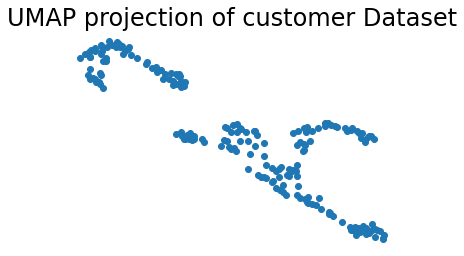

In [12]:
import matplotlib.pyplot as plt 
plt.scatter(
    umap_results[:, 0],
    umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('UMAP projection of customer Dataset', fontsize=24)

This dimensionality reduction algorithm allows us to visualize the data by reducing it to 2 dimensions, whereas it was 4 dimensions before. Human minds are not adept at visualizing anything beyond 3d, so it is common practice to utilize algorithms such as UMAP to build a 2d projection of the data that preserves the features as accuratly as possible and projects them to a 2d representation. 

Lets try another dimensionality reduction algorithm and see how the projection looks. 

In [13]:
# lets try the t-sne algorithm 

from sklearn.manifold import TSNE 

tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter =300)

tsne_result = tsne.fit_transform(df)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 1.099897
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.589973
[t-SNE] KL divergence after 300 iterations: 0.324789


Text(0.5, 1.0, 'T-SNE projection of vaccine dataset')

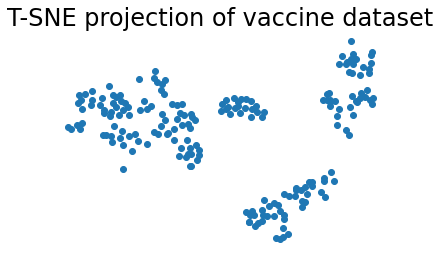

In [14]:
import matplotlib.pyplot as plt 
plt.scatter(
    tsne_result[:, 0],
    tsne_result[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('T-SNE projection of vaccine dataset', fontsize=24)

I prefer the look of the umap algorithm slightly better. This one is still showing some decent groups and would be useful for visualizations. 

Lets try PCA, one of the fastest but simplest dimensionality reduction algorithms. 

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(df)

Text(0.5, 1.0, 'PCA projection of supermarket dataset')

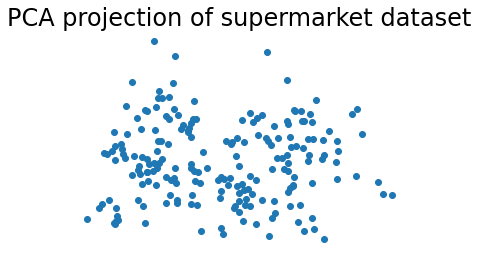

In [16]:
import matplotlib.pyplot as plt 
plt.scatter(
    pca[:, 0],
    pca[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('PCA projection of supermarket dataset', fontsize=24)

Looks like PCA just produces a single random cluster of points. It would be a better call to use either umap or t-sne for the visualizations. 

Lets try fitting a clustering model, starting with Kmeans. 

In [17]:
from sklearn.cluster import KMeans
from sklearn import metrics 
k_means = KMeans(n_clusters=4)
k_means.fit(df)
df['kmLabels'] = k_means.labels_



C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'UMAP projection of customer dataset k_means')

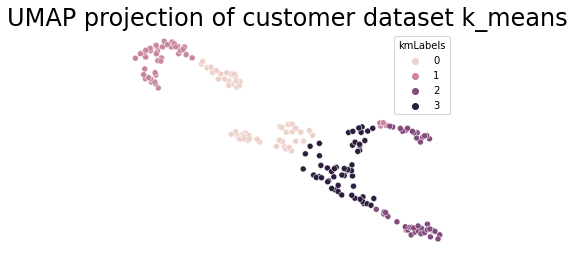

In [18]:
import seaborn as sns

sns.scatterplot(
    umap_results[:, 0],
    umap_results[:, 1], hue=df['kmLabels'])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('UMAP projection of customer dataset k_means', fontsize=24)

In [19]:
print(metrics.silhouette_score(df,k_means.labels_))

0.38883294657457057


Looks like k-means is doing a pretty good job here. We got a silhoutte score of 0.38, and a pretty clear clustering of 4 different groups. Lets try some differnt k-values and see what we get. 

<AxesSubplot:>

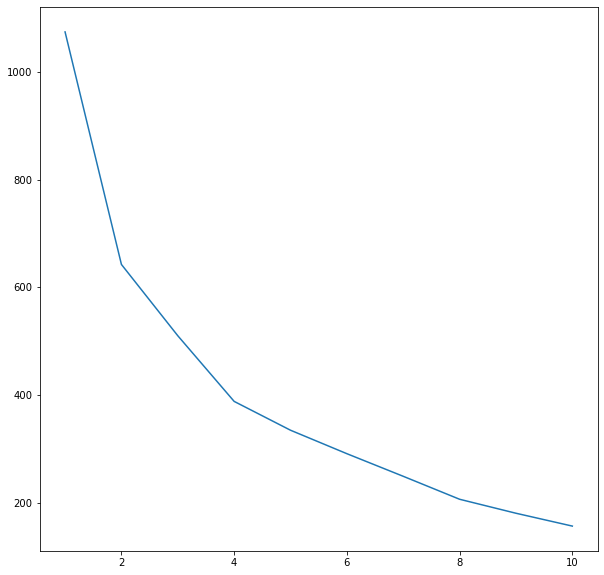

In [44]:
clusters = []

for v in range(1, 11):
    km = KMeans(n_clusters=v).fit(df)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)




Looks like 4 is most likely the k-value after all. Lets look at some different models starting with dbscan. 

In [45]:
from sklearn.cluster import DBSCAN

# Defining the model
dbscan_cluster = DBSCAN(eps=1, min_samples=20)

# Fit model
clusters = dbscan_cluster.fit(df2)

df2['db_labels'] = clusters.labels_

C:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'UMAP projection of customer dataset dbscan')

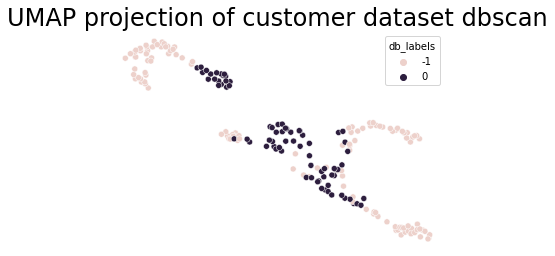

In [46]:
sns.scatterplot(
    umap_results[:, 0],
    umap_results[:, 1], hue= df2['db_labels'])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('UMAP projection of customer dataset dbscan', fontsize=24)

In [22]:
print(metrics.silhouette_score(df2,clusters.labels_))

0.1966976897764254


Dbscan did a pretty poor job compared to k-means. The data seems like it is possibly too dense for this model, as this model groups primarily on density. With a silhoutte score of 0.19, it performed far worse than k-means. 

Lets try one last model, Gaussian Mixture 

In [47]:
# try gaussian mixtures 

from sklearn.mixture import GaussianMixture

gmm_clusters = GaussianMixture(n_components=4)

#fit the model 

g_clusters = gmm_clusters.fit_predict(df3)



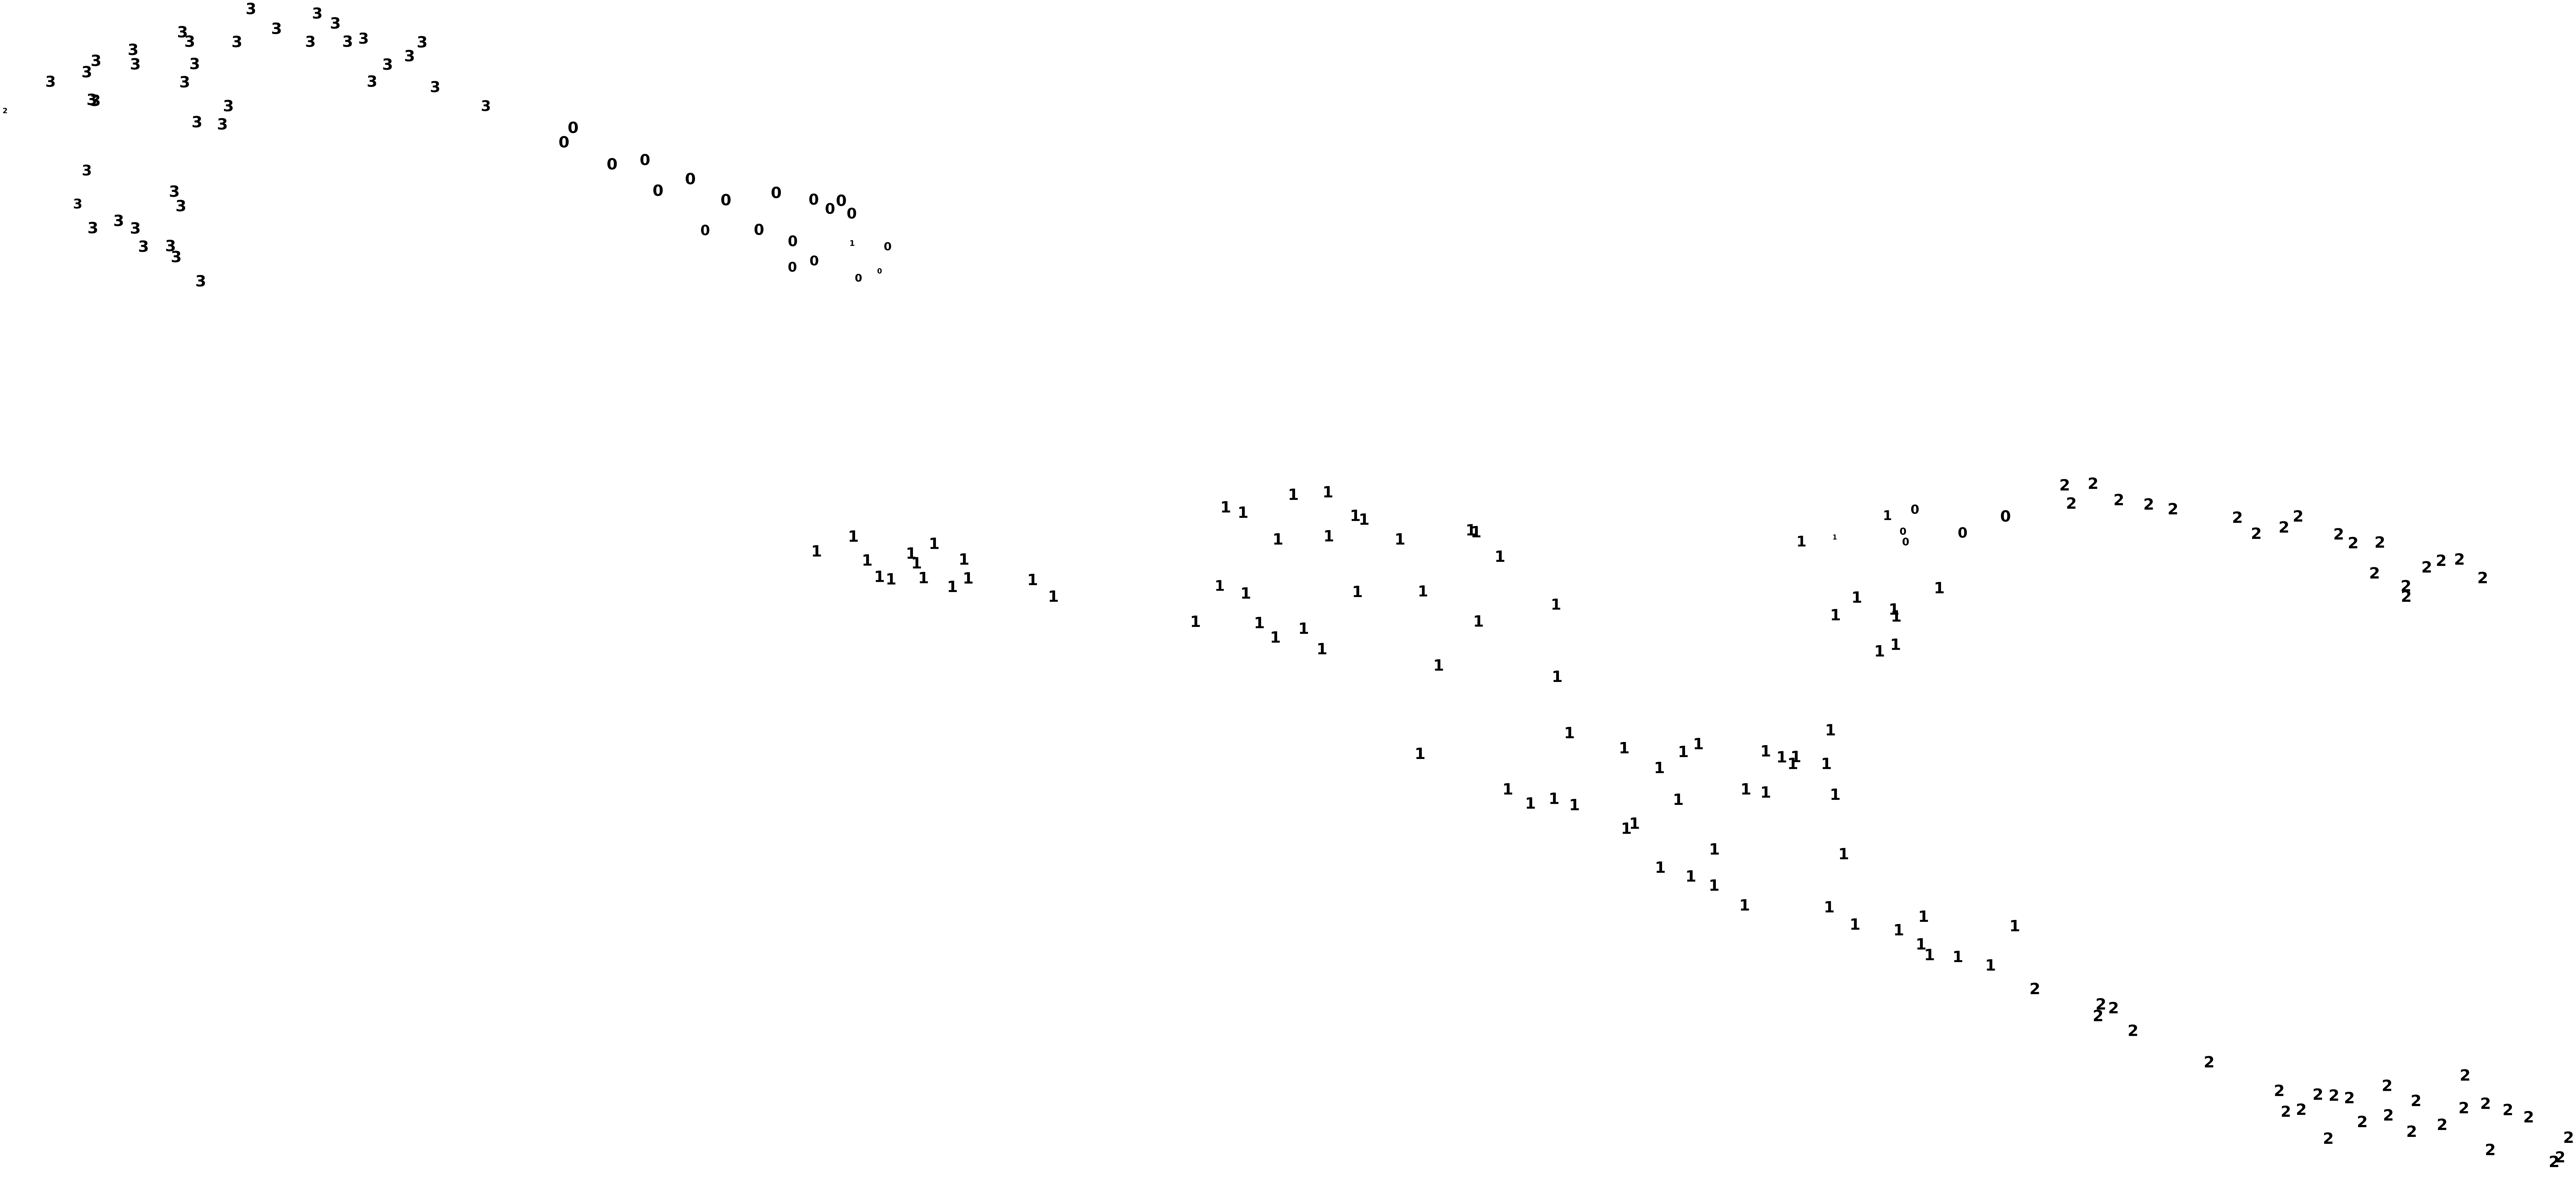

In [48]:
probs = gmm_clusters.predict_proba(df3)

size = 50 * probs.max(1) ** 2  # square emphasizes differences

plt.figure(figsize=(10,5))

for i in range(pca.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(g_clusters[i]),
             fontdict={'weight': 'bold', 'size': size[i]})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [25]:
print(metrics.silhouette_score(df3, g_clusters,metric = 'euclidean'))

0.15158762200686896


This model perfomed the worst out of all 3 of them. It had the lowest silhoutte score, and the clusters seem to overlap considerably in the visuliazation. Seems like k-means is the best choice for clustering this dataset. 